# Problem 1

a) The degree of each node is as follows:

- Node 1: 2
- Node 2: 3
- Node 3: 5
- Node 4: 3
- Node 5: 1
- Node 6: 2
- Node 7: 2

The relative frequency of degrees (which is precisely the degree disribution) is, thus:

- Degree 1: $P(1) = 1 / 7$
- Degree 2: $P(2) = 3 / 7$
- Degree 3: $P(3) = 2 / 7$
- Degree 4: $P(4) = 0 / 7$
- Degree 5: $P(5) = 1 / 7$

b) The local clustering coefficient of a node $i$ is given by

$$
c_i = \frac{e_i}{k_i \cdot (k_i - 1)\ /\ 2}
$$

Where $e_i$ is the number of edges in the subgraph $G_i$ of neighbors of node $i$, $k_i$ is the degree of node $i$.

The local clustering coefficient of each node is therefore:

- Node 1: $1 / 1$
- Node 2: $2 / 3$
- Node 3: $2 / 10$
- Node 4: $2 / 3$
- Node 5: $0 / 0$
- Node 6: $1 / 1$
- Node 7: $1 / 1$

c) The difficulty here is to count the number of triads...

- Triads centered on node 1: 1
- Triads centered on node 2: 3
- Triads centered on node 3: 10
- Triads centered on node 4: 3
- Triads centered on node 5: 0
- Triads centered on node 6: 1
- Triads centered on node 7: 1
- Total: 19

The transitivity of the graph is then:

$$
\frac{3 \cdot no.\ of\ triangles}{no.\ of\ triads} = \frac{3 \cdot 3}{19} = \frac{9}{19}
$$

d) The distance matrix is:

$$
\begin{bmatrix}
    0 & 1 & 2 & 1 & 3 & 3 & 3 \\
    1 & 0 & 1 & 1 & 2 & 2 & 2 \\
    2 & 1 & 0 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 2 & 2 & 2 \\
    3 & 2 & 1 & 2 & 0 & 2 & 2 \\
    3 & 2 & 1 & 2 & 2 & 0 & 1 \\
    3 & 2 & 1 & 2 & 2 & 1 & 0 \\
\end{bmatrix}
$$

e) The entropy is:

$$
E = -[ 1/7 \cdot log_2(1/7) + 3/7 \cdot log_2(3/7) + 2/7 \cdot log_2(2/7) + 1/7 \cdot log_2(1/7)] = 1.842371
$$

Where I have arbitrarily chosen the logarithm base as being 2 (I'm a computer scientist, after all).

f) The second moment is

$$
    E(X^2) = \sum_{x \in X} x^2 \cdot p(x) = 8
$$

We now answer the same questions by means of python programming.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

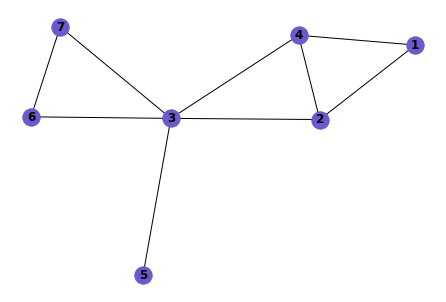

In [48]:
G = nx.Graph()
G.add_edges_from([
        [1, 2], [1, 4],
        [2, 1], [2, 4], [2, 3],
        [3, 4], [3, 5], [3, 6], [3, 7],
        [6, 7]
    ])

plt.figure()
nx.draw(G, with_labels=True, font_weight="bold", node_color="slateblue")
plt.show()

In [62]:
nodes = [ i for i in G.nodes() ]
degs = [ G.degree[n] for n in nodes ] 

print("Answer of a)")
for deg in np.unique(degs):
    print("Degree {}: P({}) = {}/{}".format(
        deg,
        deg,
        sum(degs == deg),
        len(nodes)
    ))

Answer of a)
Degree 1: P(1) = 1/7
Degree 2: P(2) = 3/7
Degree 3: P(3) = 2/7
Degree 5: P(5) = 1/7


In [64]:
print("b) Local clustering")
for n in sorted(G.nodes()):
    print("Node {}: {}".format(n, nx.clustering(G, n)))

b) Local clustering
Node 1: 1.0
Node 2: 0.6666666666666666
Node 3: 0.2
Node 4: 0.6666666666666666
Node 5: 0
Node 6: 1.0
Node 7: 1.0


In [67]:
print("c) Transitivity: {}".format(nx.transitivity(G)))

c) Transitivity: 0.47368421052631576


In [77]:
print("d) Distance matrix:")

nodes = sorted(G.nodes())
paths = nx.shortest_path(G)

for i in nodes:
    for j in nodes:
        print(len(paths[i][j]) - 1, end=" ")
    print()

d) Distance matrix:
0 1 2 1 3 3 3 
1 0 1 1 2 2 2 
2 1 0 1 1 1 1 
1 1 1 0 2 2 2 
3 2 1 2 0 2 2 
3 2 1 2 2 0 1 
3 2 1 2 2 1 0 


In [118]:
nodes = [ i for i in G.nodes() ]
degs = [ G.degree[n] for n in nodes ] 

freqs = dict()
for deg in np.unique(degs):
    freqs[deg] = sum(degs == deg)

def prob(x):
    if x not in freqs:
        return 0
    else:
        return freqs[x] / sum(freqs.values())

probs = [ prob(i) for i in range(0, 100) ]
entropy = -sum([ p*np.log2(p) for p in probs if p != 0])

print("e) Entropy: {}".format(entropy))
print("f) Second moment: {}".format(sum([ i**2 * probs[i] for i in range(0, 100) ])))

e) Entropy: 1.8423709931771084
f) Second moment: 7.999999999999999


### All results match!

# Problem 2

In [54]:
lesG = nx.read_weighted_edgelist("lesmis.txt", nodetype=int, create_using=nx.DiGraph)
lesG.remove_edges_from(lesG.selfloop_edges())
#lesG = sorted(nx.connected_component_subgraphs(lesG), key = len)[-1]

ecoG = nx.read_weighted_edgelist("eco-foodweb-baywet.txt", nodetype=int, create_using=nx.DiGraph)
ecoG.remove_edges_from(ecoG.selfloop_edges())
#ecoG = sorted(nx.connected_component_subgraphs(ecoG), key = len)[-1]

In [55]:
print(lesG.is_directed(), ecoG.is_directed())

True True


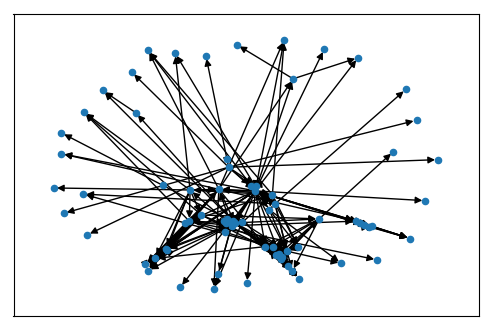

In [56]:
plt.figure(dpi=100)
nx.draw_networkx(lesG, arrows=True, pos=nx.spring_layout(lesG), with_labels=False, node_size=20)

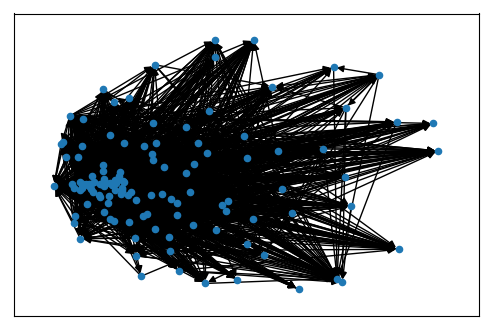

In [57]:
plt.figure(dpi=100)
nx.draw_networkx(ecoG, arrows=True, pos=nx.spring_layout(ecoG), with_labels=False, node_size=20)

In [62]:
lesGU = lesG.to_undirected()
ecoGU = ecoG.to_undirected()

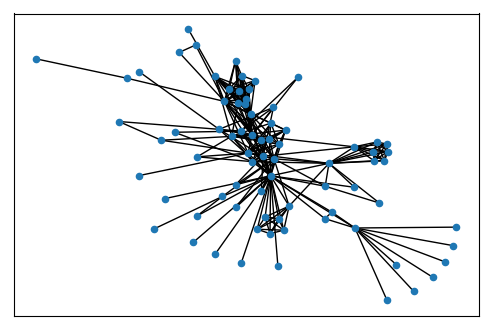

In [64]:
plt.figure(dpi=100)
nx.draw_networkx(lesGU, arrows=True, pos=nx.spring_layout(lesGU), with_labels=False, node_size=20)

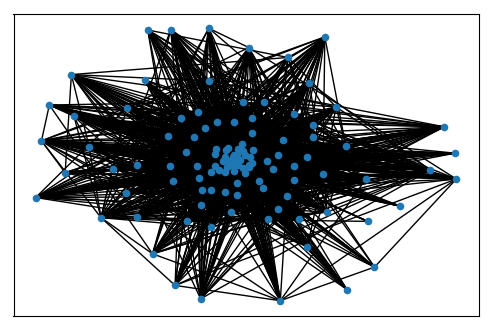

In [65]:
plt.figure(dpi=100)
nx.draw_networkx(ecoGU, arrows=True, pos=nx.spring_layout(ecoGU), with_labels=False, node_size=20)

# Problem 3

In [111]:
initialNode = np.random.choice(lesGU.nodes)
visitCount = dict([ (i, 0) for i in lesGU.nodes ])
visitCount.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [112]:
curNode = initialNode
visitCount[curNode] += 1

for i in range(10000):
    adjacency = lesGU.adj[curNode]
    adjacency = list(adjacency)
    curNode = np.random.choice(adjacency)
    visitCount[curNode] += 1

print(visitCount)

{1: 23, 2: 171, 3: 46, 4: 52, 5: 15, 6: 12, 7: 18, 8: 17, 9: 16, 10: 19, 11: 663, 12: 23, 13: 41, 14: 16, 15: 22, 16: 12, 24: 288, 25: 230, 26: 322, 27: 217, 28: 310, 29: 58, 30: 160, 32: 71, 33: 20, 34: 31, 35: 125, 36: 112, 37: 113, 38: 127, 39: 122, 44: 49, 45: 41, 49: 441, 50: 147, 52: 165, 56: 364, 59: 303, 65: 253, 69: 186, 70: 193, 71: 168, 72: 170, 73: 55, 17: 152, 18: 188, 19: 143, 20: 152, 21: 146, 22: 133, 23: 141, 31: 37, 42: 223, 43: 55, 51: 42, 40: 62, 41: 29, 76: 125, 55: 77, 46: 8, 53: 50, 58: 227, 63: 281, 47: 37, 48: 18, 60: 246, 61: 194, 62: 231, 64: 246, 66: 258, 67: 199, 74: 32, 75: 36, 77: 156, 57: 27, 54: 22, 68: 21}


In [124]:
import pandas as pd

In [135]:
#plt.figure(dpi=100)
#plt.hist(list(visitCount.values()))
#plt.figure(dpi=100)
#plt.hist([i[1] for i in lesGU.degree()])

allDegrees = lesGU.degree()

nodeIds = [ i for i in visitCount.keys() ]
visits  = [ visitCount[j] for j in nodeIds ]
degree  = [ allDegrees[j] for j in nodeIds ]

df = pd.DataFrame({
        "visits": visits,
        "degree": degree
    },
    index=nodeIds
)

df.corr()

,visits,degree
visits,1.00000,0.99463
degree,0.99463,1.00000


### Here we see that yes, degree and number of visits are correlated!

# Problem 4

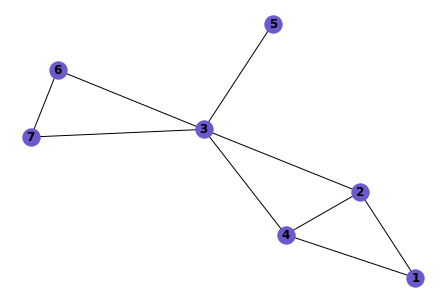

In [136]:
G = nx.Graph()
G.add_edges_from([
        [1, 2], [1, 4],
        [2, 1], [2, 4], [2, 3],
        [3, 4], [3, 5], [3, 6], [3, 7],
        [6, 7]
    ])

plt.figure()
nx.draw(G, with_labels=True, font_weight="bold", node_color="slateblue")
plt.show()

In [176]:
adjMatrix = np.matrix([0 for i in range(7*7)], dtype=float).reshape((7, 7))

for src in G.adj:
    for dest in G.adj[src]:
        adjMatrix[src-1, dest-1] = 1

for i in range(7):
    adjMatrix[i] = adjMatrix[i] / np.sum(adjMatrix[i])

with np.printoptions(precision=3, suppress=True):
    print(adjMatrix**10)

with np.printoptions(precision=3, suppress=True):
    print("\n\n")
    print(adjMatrix**100)

[[0.119 0.167 0.285 0.167 0.052 0.106 0.106]
 [0.111 0.172 0.269 0.172 0.057 0.11  0.11 ]
 [0.114 0.161 0.291 0.161 0.053 0.11  0.11 ]
 [0.111 0.172 0.269 0.172 0.057 0.11  0.11 ]
 [0.103 0.171 0.263 0.171 0.061 0.116 0.116]
 [0.106 0.165 0.276 0.165 0.058 0.116 0.115]
 [0.106 0.165 0.276 0.165 0.058 0.115 0.116]]



[[0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]
 [0.111 0.167 0.278 0.167 0.056 0.111 0.111]]


### We see that the values in a column are all the same

In [348]:
size = len(lesGU.nodes) # Undirected les miserables network
D = np.matrix(np.zeros(shape=(size, size)))
A = np.matrix(np.zeros(shape=(size, size)))

for src in lesGU.adj:
    for dest in lesGU.adj[src]:
        A[src-1, dest-1] = 1

print(A)

P = np.matrix(np.copy(A))        
for i in range(size):
    P[i] = P[i] / np.sum(P[i])

print(P)
    
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i, j] = len(nx.shortest_path(lesGU, i+1, j+1))

D[1], D[30]

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.    1.    0.    ... 0.    0.    0.   ]
 [0.1   0.    0.1   ... 0.    0.    0.   ]
 [0.    0.333 0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


(matrix([[2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
          4., 4., 4., 4., 4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 4., 3.,
          3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 3., 3., 4., 4., 5.,
          3., 3., 4., 3., 4., 4., 4., 3., 4., 4., 3., 4., 4., 4., 4., 4.,
          3., 4., 4., 5., 3., 3., 3., 3., 3., 4., 4., 4., 4.]]),
 matrix([[5., 4., 4., 4., 5., 5., 5., 5., 5., 5., 3., 4., 3., 4., 4., 4.,
          3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 4., 3., 4., 3., 1., 2.,
          4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 6.,
          4., 4., 4., 4., 5., 5., 5., 4., 5., 5., 4., 5., 5., 5., 5., 5.,
          4., 5., 5., 6., 4., 4., 4., 4., 4., 5., 5., 4., 5.]]))

In [349]:
print("Total number of elements:", A.shape[0] * A.shape[1])
print("Number of non-zero elements:", np.sum(A))
print("Number of non-zero elements in A**3:", np.sum(A**3))

Total number of elements: 5929
Number of non-zero elements: 508.0
Number of non-zero elements in A**3: 68110.0


[[ 1.    -0.615]
 [-0.615  1.   ]]


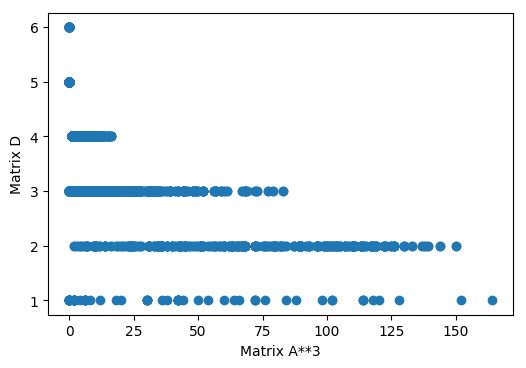

In [359]:
plt.figure(dpi=100)
plt.scatter((A**3).A1, D.A1)
plt.xlabel("Matrix A**3")
plt.ylabel("Matrix D")
print(np.corrcoef((A**3).A1, D.A1))

### The correlation is -0.546, but I fail to see the real meaning of this

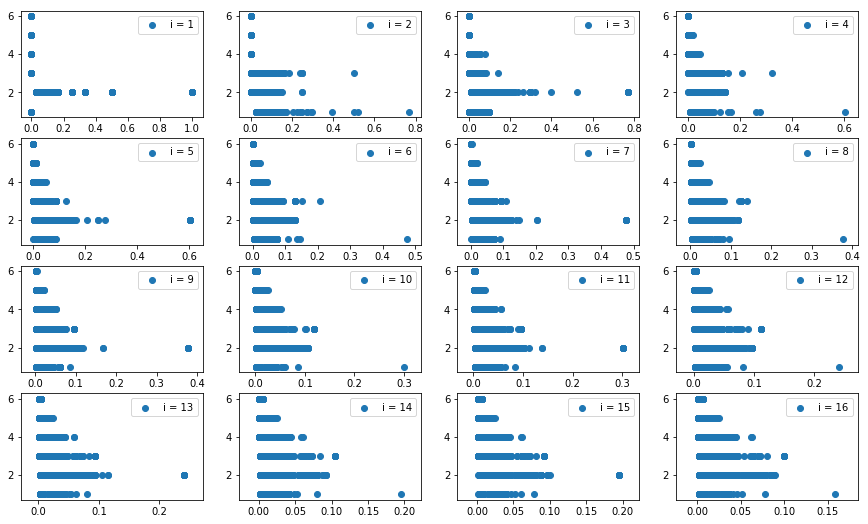

In [375]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 9))

ax = ax.ravel()

for i in range(1, 16+1):
    ax[i-1].scatter((P**i).A1, D.A1, label="i = {}".format(i))
    ax[i-1].legend()

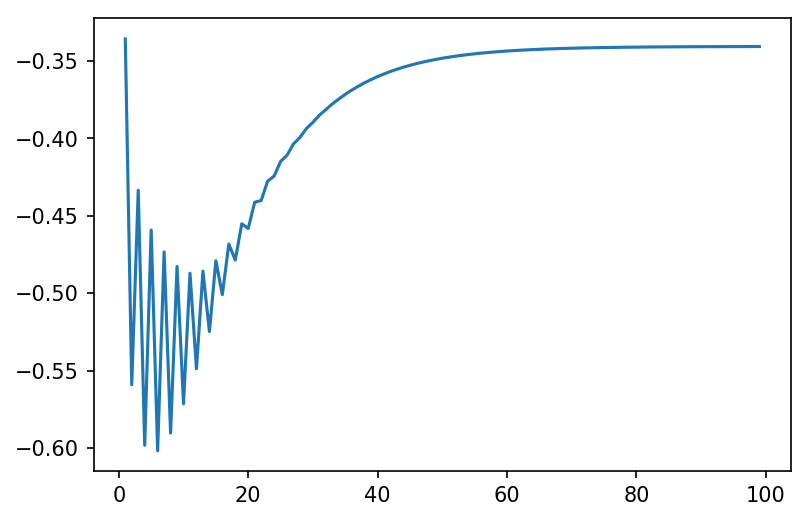

In [382]:
def calc_correlation(i):
    coeff = np.corrcoef((P**i).A1, D.A1)
    return coeff[0, 1]

x = range(1, 100)
plt.figure(dpi=150)
plt.plot(x, [ calc_correlation(i) for i in x ])

This is interesting.

We are correlating two things:

- The probability of going from i to j in k steps
- The distance between i and j

The negative correlation is expected, as a higher distance between i and j implies a lower probability of going from i to j.

My hypothesis is that the lowest correlation comes when the value of 'k' is the mean of all distances between any two nodes. Let us check this.

In [387]:
x = range(1, 100)
idx = np.argmin([ calc_correlation(i) for i in x ])
print(x[idx])

print(np.mean(D.A1))

6
3.6068476977567885


Well, close enough... I guess

Let us see the distribution of D

(array([  77.,  508.,    0., 1990., 2502.,    0.,  798.,   54.]),
 array([1.   , 1.625, 2.25 , 2.875, 3.5  , 4.125, 4.75 , 5.375, 6.   ]),
 <a list of 8 Patch objects>)

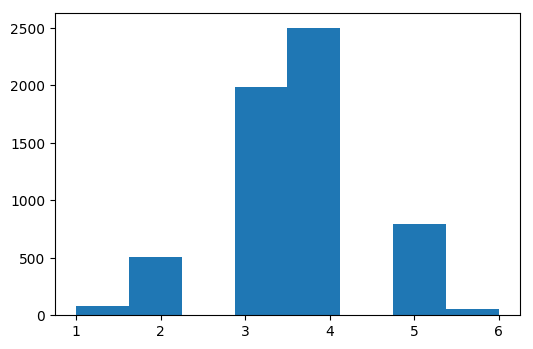

In [391]:
plt.figure(dpi=100)
plt.hist(D.A1, bins=8)

# Problem 5

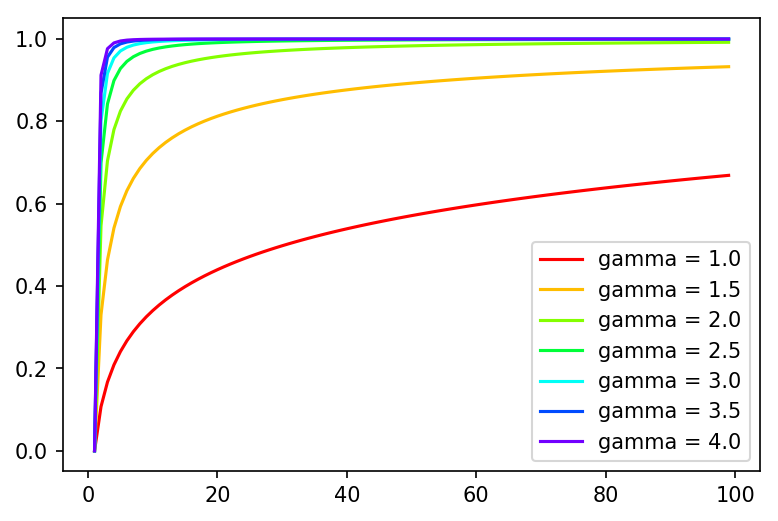

In [433]:
from matplotlib import cm

color = cm.get_cmap("hsv")


def prob(k, A=1, gamma=2.5):
    return A*k**(-gamma)

def cum(k, A=1, gamma=2.5):
    probs = np.array([ prob(i, A, gamma) for i in range(1, 1001) ])
    return np.trapz(probs[:k]) / np.trapz(probs)

plt.figure(dpi=150)
x = range(1, 100)
for i in np.arange(1, 4.01, step=0.5):
    plt.plot(x, [cum(j, gamma=i) for j in x], c=color( (i-1)/4 ), label="gamma = {}".format(i))

plt.legend()

### As we can see, a bigger coefficient (a more negative one) leads to a higher density of low-degree nodes

# Problem 6